# Lab 6: Root finding (2)

In this lab we will continue our study of root-finding methods, now considering the famous Newton-Raphson algorithm (this is sometimes just called 'Newton's Method'. This requires that we know the function's derivative; we can either specify this by hand or use the differentiation algorithms from Lab 5.

**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    **YOUR NAME HERE**
* SID:     **YOUR STUDENT NUMBER**



## The Newton-Raphson method: basics

Recall that the Newton-Raphson algorithm involves linearising the function at some guess $x_0$ – that is, we follow the *derivative* down to the $x$-axis rather than the function itself:

![newton.png](attachment:newton.png)

Mathematically, 
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

**Write a function `newton_step(f, fp, x0)` to calculate the next step** (*i.e.*, it returns $x_1$) **from the Newton-Raphson algorithm**, given function `f` and its derivative `fp` (“f prime”) and starting value `x0`.

In [4]:
from numpy import *


def derivative(f, a, h=0.01):
    return (f(a + h) - f(a - h)) / (2 * h)


def newton(f, x0):
    return x0 - f(x0) / derivative(f, x0)


print(newton(cos, 1))

1.6421033176027842


As a test, let's use this to calculate $\sqrt{2}$. **Define two (Python) functions** corresponding to the mathematical functions $f(x) = x^2 - 2$ and its derivative $f'(x) = 2x$. Then **choose a suitable starting guess** and **write a loop to call your Newton-Raphson function until it has converged** – say, until $x_n$ and $x_{n+1}$ differ by less than a small number $\epsilon = 10^{-8}$.

**Check your result** by confirming the value of the function at your root (i.e., is $f(x_{n+1})$ close to zero, or in this case is $x_{n+1}$ close to $\sqrt{2}$). **How many iterations were necessary?**  It can be useful to write your code to automatically count the number of iterations.

**Code defensively** - In the event the method fails and continues to iterate indefinitely, it can be helpful to set an upper limit on the number of iterations allowed (e.g., 35).  This prevents the code from iterating without end if it should fail or contain a mistake.  In this sense the stopping criteria are:

$$|x_{n+1} - x_{n}| < \epsilon $$
or 
the number of iterations exceeds some number `Nitermax`

It can be useful to check your final result if it converged successfully or exceeded the allowed number of iterations and print useful feedback.

Since we'll be using these values repeatedly it is useful to store them in variables with meaningful names.  We can then easily change them as needed (e.g., for lower/higher precision or higher/lower number of iterations.)

initial guess:  1
-------
x:  1.5
iteration:  1
f(x):  0.25
fp(x):  3.0
--------
x:  1.4166666666666667
iteration:  2
f(x):  0.006944444444444642
fp(x):  2.8333333333333335
--------
x:  1.4142156862745099
iteration:  3
f(x):  6.007304882871267e-06
fp(x):  2.8284313725490198
--------
x:  1.4142135623746899
iteration:  4
f(x):  4.510614104447086e-12
fp(x):  2.8284271247493797
--------
x:  1.4142135623730951
iteration:  5
f(x):  4.440892098500626e-16
fp(x):  2.8284271247461903
--------
initial guess:  2
x:  10.05
iteration:  1
f(x):  99.00250000000001
fp(x):  20.1
--------
x:  5.124502487562189
iteration:  2
f(x):  24.260525745031067
fp(x):  10.249004975124379
--------
x:  2.7573921384195743
iteration:  3
f(x):  5.603211405018073
fp(x):  5.514784276839149
--------
x:  1.741357580449592
iteration:  4
f(x):  1.0323262229892571
fp(x):  3.482715160899184
--------
x:  1.444943381958916
iteration:  5
f(x):  0.08786137706686947
fp(x):  2.889886763917832
--------
x:  1.4145403301286927
iteration:

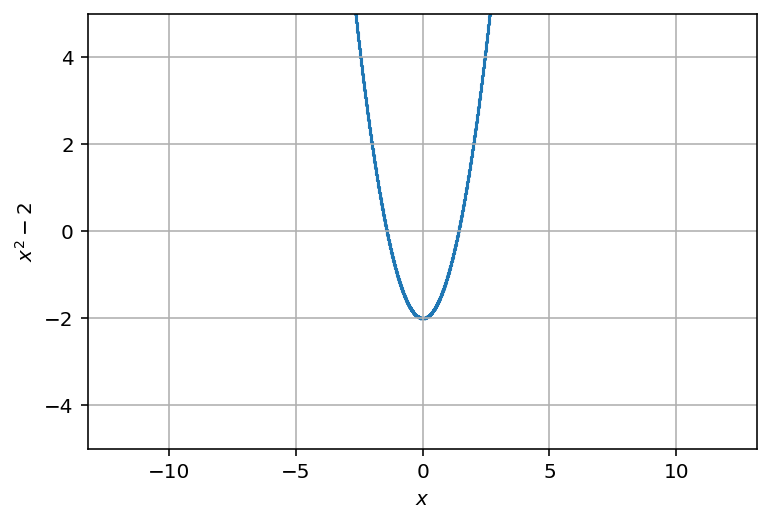

In [138]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x ** 2 - 2


def fp(x):
    return 2 * x


def newton(f, fp, x0):
    return x0 - f(x0) / fp(x0)


x = 1  # initial guess
n = 1
epsilon = 1e-12
print('initial guess: ', x)
print('-------')
while abs(f(x)) > epsilon:
    x = newton(f, fp, x)
    print('x: ', x )
    print('iteration: ', n)
    print('f(x): ', f(x))
    print('fp(x): ', fp(x))
    print('--------')
    n = n + 1
    if n > 100:
        break

x = 20  # initial guess
n = 1
epsilon = 1e-12
print('initial guess: ', 2)
while abs(f(x)) > epsilon:
    x = newton(f, fp, x)
    print('x: ', x )
    print('iteration: ', n)
    print('f(x): ', f(x))
    print('fp(x): ', fp(x))
    print('--------')
    n = n + 1
    if n > 100:
        break
        
        
x = linspace(-12, 12, 10000)
y = f(x)
plt.xlabel('$x$')  # note the use of dollar signs for LaTeX-like maths syntax
plt.ylabel('$x^2-2$')
plt.scatter(x, y, s=0.3)  # the s option here gives the size of the symbol
plt.ylim(-5, 5)
plt.grid()
plt.show()

'''
x = 4
print(x)
eps = 10**-8
x_new = newton(f,fp,x)

n = 1
while abs(x_new - x) > eps:
    x = newton(f,fp,x)
    x_new = newton(f,fp,x)
    print(x)
    n = n + 1
    if n > 100:
        n = 0
        print('reached 100 iterations')
        break
'''

**Reminder - with numerical root finding it is always a good idea to get a sense of the function before trying to find its roots.**  This can be done simply by inspection (e.g., the simple example above) or by plotting the function.   Plotting can be useful as it illustrates all the local features that affect the behaviour of the numerical method (e.g., inflection points, local extrema, asymptotes, divergences, ... etc).

Let's investigate how convergence depends on the starting guess. What happens if you start with a guess that is further away? **Try some different starting guesses and come to a conclusion about how dependent the answer we get is on the starting point. Can you explain your results?** (Suggested guesses to try: $10^5$; $-1$; $0$; small values near 0;....). 

Try to predict how the algorithm will function with an initial guess.  Then explain what is happening.

Some things that might help you interpret your results include, plotting the function, printing values of $x_{i}, f(x_{i}), f'(x_{i})$ for each iteration.

Include your code and results for different initial guesses in separate markdown cells. >>>>>>>>!!!!!!!!!this is done in the cell above!!!!!!!!!<<<<<<<<<<<<<


Finally, edit the markdown cell below to add new results for different initial guesses to the table.

Include your explanation.


## Solving Roots of f(x)
| Initial Guess ($x_o$)  | Number of iterations |  Root Found  | Comment |
|----|----|----|----|
| 1   |   5  |  sqrt(2)   |  works as it should, converges at root sqrt(2)  |
| 1e5 |  21   |  sqrt(2)   |  works as it should, takes slightly longer then 1  |
|  0 |  0   |  N/A   |  division by 0 error  |
| 1e-5  |  31   |  sqrt(2)   |  takes longer then 1e+5  |
|  ...  |     |     |    |


▶ **CHECKPOINT 1**

## A trickier example

Let's try a more interesting function. We saw in the very first lecture that, in quantum mechanics, the energies available to a particle trapped in a finite well are given by the solutions of equations similar to $\tan(x) = x$. **Use the Newton-Raphson method to find all solutions to this equation in the range $0 \leq x \leq 10$.** 

*Hint*: You will need to rearrange the equation into the form $g(x) = 0$ for some $g(x)$. You may find it helpful to plot this function first.

*Hint 2*: The derivative of $\tan(x)$ is $\sec^2(x)$. The `numpy` module does *not* contain a secant function, so you may want to define your own (recalling that $\sec(x) = 1/\cos(x)$).

*Hint 3*:  It can be helpful to plot the function to identify regions where roots exist, to choose initial guesses and interpret your results. A scatter plot with lots of points can help illustrate plot features here.

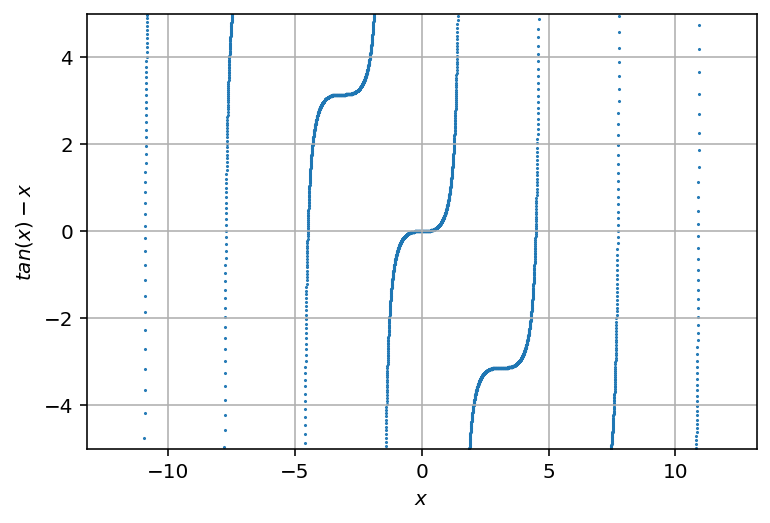

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *

def g(x):
    return (tan(x) - x)

def gp(x):
    return ((1/cos(x))**2 - 1)


x = linspace(-12, 12, 10000)
y = g(x)
plt.xlabel('$x$')         # note the use of dollar signs for LaTeX-like maths syntax
plt.ylabel('$tan(x)-x$')
plt.scatter(x, y, s=0.3)  # the s option here gives the size of the symbol
plt.ylim(-5,5)
plt.grid()

0.004656155208204482
1.9107891175801253e+59
3.3594418915251e+65
7.226155715831119e+67
1.656656197305363e+51
3.4474462093098826e+64
3.8031161529696806e+58
10.904121659510574
1.542708958973325e+60
3.382128111129229e+71
----------
4.493409457909247 4


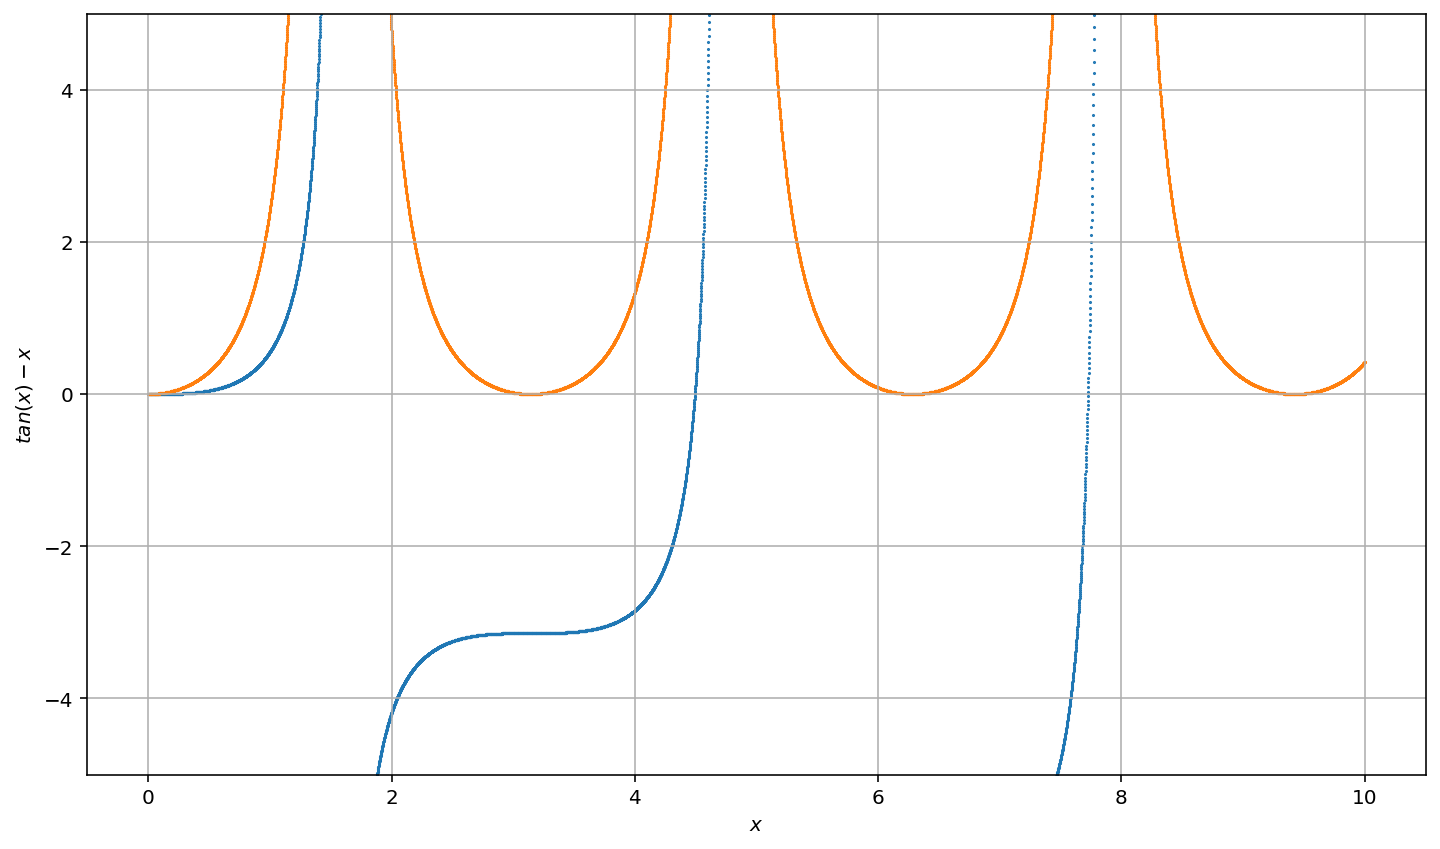

In [3]:
from numpy import *
import matplotlib.pyplot as plt


def f(x):
    return tan(x) - x


def fp(x):
    return (1 / cos(x)) ** 2 - 1


def newton(f, fp, x0):
    return x0 - (f(x0) / fp(x0))

for x in range(1,11):
    initial = x
    #x = 1
    n = 1
    epsilon = 1e-7
    while abs(f(x)) > epsilon and n < 100:
        x = newton(f,fp,x)
        n = n + 1
    print(x)
print('----------')


x = 4.5
n = 1
epsilon = 1e-7
while abs(f(x)) > epsilon and n < 100:
    x = newton(f,fp,x)
    n = n + 1
print(x, n)


x = linspace(0, 10, 10000)
y1 = f(x)
y2 = fp(x)
plt.xlabel('$x$')  # note the use of dollar signs for LaTeX-like maths syntax
plt.ylabel('$tan(x)-x$')
plt.scatter(x, y1, s=0.3)
plt.scatter(x, y2, s=0.3)# the s option here gives the size of the symbol
plt.ylim(-5, 5)
plt.grid()
plt.show()


**Explore carefully for which starting guesses the Newton-Raphson converges, to which solution, and in how many iterations.**

(Suggested guesses to try: 0.1, 4, 4.5, 8,...   but you should try other ones too) - edit this cell and summarise your results in the table below.

| Initial Guess ($x_o$)  | Number of iterations |  Root Found  | Comment |
|----|----|----|----|
| 0.1   | as many as it wants, related to comment & epsilon  |  kinda 0  |  approaches 0 based on epsilon, decrease epsilon for root closer to 0, due to curve at x almost = 0  |
| 4.5 | 4  |  4.493409457909247  |  i was testing just 4 for 5 days and expected this root but it comes up with 4.5 instead... i thought my code was broken for almost a week i hate life hahahahahahahahahaha  |
| 8   | 7  | 10.904121659510574   |   expected |
| 4 | 100  |  7.226155715831119e+67  |   wtf |
|... | | | |



▶ **CHECKPOINT 2**

## Using numerical derivatives

Of course, sometimes it is inconvenient to program in the derivative of the function we're exploring. Fortunately, last lab we have seen how to calculate the derivative numerically. I have copied below our central-difference function from that lab, setting the default value of the step size $h$ to $10^{-5}$. 

(Why did we choose $h=10^{-5}$? See the error plot in the last lab.)

In [3]:
def CD(f, x, h=1e-5):
    """Estimate the derivative f'(x) using the central difference algorithm with step size h."""
    return (f(x + h/2) - f(x - h/2))/h


def f(x):
    return tan(x) - x


def newton(f, fp, x0):
    return x0 - (f(x0) / fp(x0))


def newton_CD_step(f,x0):
    return x0 - (f(x0) / CD(f, x0))

for i in range(1,11):
    print('initial x:', i)
    x = newton_CD_step(f,i)
    n = 1
    while abs(f(x)) > 1e-5 and n < 100:
        x = newton_CD_step(f,x)
        n = n + 1
    if x == inf:
            print('root was infinity for inital x value:', i)
    else:
            print('final root:', x)
    print('iterations:', n)
    print('------')

initial x: 1
final root: 0.023568765865397016
iterations: 10
------
initial x: 2
root was infinity for inital x value: 2
iterations: 32
------
initial x: 3
root was infinity for inital x value: 3
iterations: 17
------
initial x: 4
root was infinity for inital x value: 4
iterations: 19
------
initial x: 5
root was infinity for inital x value: 5
iterations: 25
------
initial x: 6
root was infinity for inital x value: 6
iterations: 14
------
initial x: 7
root was infinity for inital x value: 7
iterations: 17
------
initial x: 8
final root: 10.904121659510583
iterations: 6
------
initial x: 9
root was infinity for inital x value: 9
iterations: 15
------
initial x: 10
root was infinity for inital x value: 10
iterations: 13
------


<ipython-input-3-b277ecd1eb53>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return x0 - (f(x0) / CD(f, x0))
<ipython-input-3-b277ecd1eb53>:7: RuntimeWarning: invalid value encountered in tan
  return tan(x) - x


**Write a revised function `newton_CD_step(f, x0)` to perform one step of the Newton-Raphson algorithm, this time using the derivative from the `CD()` function.**

**Can you find the same roots using this method as you did using the exact derivative?**

▶ **CHECKPOINT 3**